# VesselImage
![](./imgs/demo.png)
**VesselImage** 用于将血管或神经造影转化为图，并以此为基础应用一系列图与复杂网络算法。

## 特性
* 载入 ```.hoc``` 文件
* 将 Filament 序列转换为图
* ~~自动消除追踪错误~~
* 给定根节点后，通过广度优先搜索 (BFS) 判断同一连通分支内各点的层级
* 统计各层级的平均路径长度与平均血管粗细
* 若干可视化方法

## 如何安装？
如果以下代码块可以正常运行 (Jupyter快捷键: <Ctrl + Enter>)，说明安装成功；倘若不然，请修复或重新安装 Anaconda.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
from vestools import *

## 简单上手
下面是一个简单的流程，包括打开文件、构建网络、确定层级与可视化等步骤。

### 打开并构建

In [2]:
# 从 .hoc 文件获取各连通分支并合并为一个序列列表
comp_dict = get_components('1.hoc')
seq_list = []
for seqs in comp_dict.values():
    seq_list += seqs

# 将序列列表转换为 Filament 对象，自动构建网络
fila = Filament(seq_list)

### 可视化选择根节点
获得网络后，我们需要借助可视化方法观察其结构，并人为选择根节点：

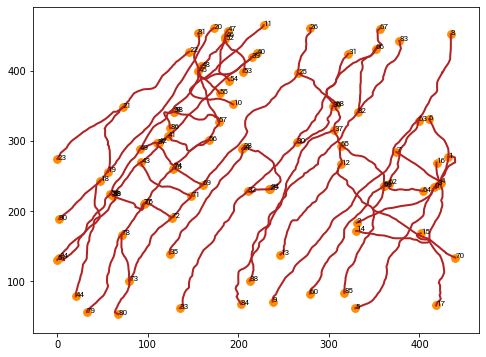

In [3]:
# 创建一块画布
fig = plt.figure(figsize=(8, 6))
# 创建一个绘图区域
ax = fig.add_subplot(111)
# 绘图
fila.plot_2d(ax, s=60, color="darkorange")
plt.show()

除却 z 轴投影图，我们也可以直接通过三维图像观察网络结构：

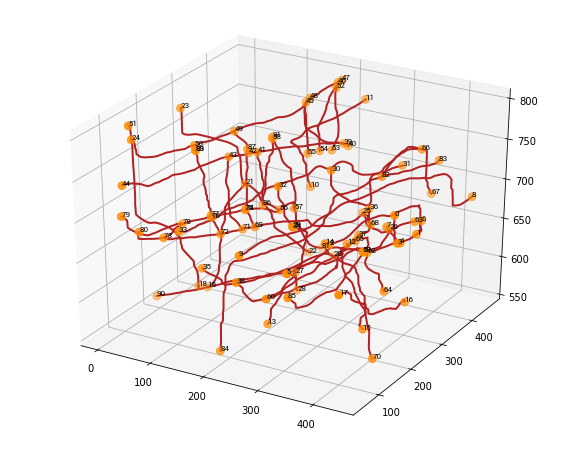

In [4]:
# 创建一块画布
fig = plt.figure(figsize=(10, 8))
# 创建一个 3d 绘图区域
ax = fig.add_subplot(111, projection='3d')
# 绘图
fila.plot_3d(ax, s=60, color="darkorange")
plt.show()

图中每个数字代表一个节点的编号。在选择了合适的节点后，记住其编号，我们进入下一步：

### 确定层级

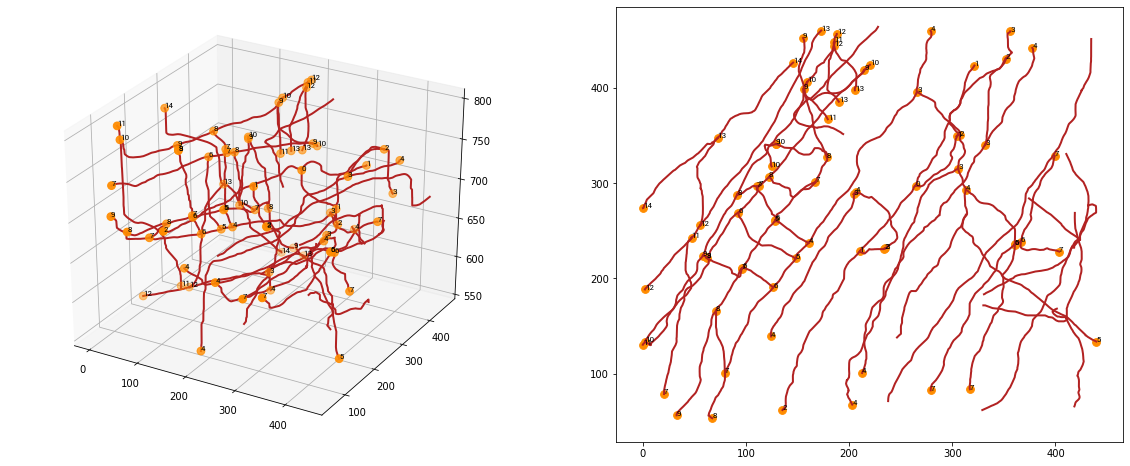

In [5]:
# 选择上图中编号为 30 的节点作为根节点
root = 30
# 深度优先遍历，自动分析各节点的层级
fila.dfs(root)

# 绘制层级信息
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)
# True 代表绘制层级信息
fila.plot_3d(ax1, True, s=60, color="darkorange")
fila.plot_2d(ax2, True, s=60, color="darkorange")
plt.show()

确定层级后，```Filament``` 对象内将节点们依层级储存在字典 ```fila.layer_dict``` 中。

In [6]:
fila.layer_dict

{0: [FilamentNode(264.51, 297.684, 733.922)],
 1: [FilamentNode(321.452, 423.815, 714.22),
  FilamentNode(210.333, 228.361, 724.815),
  FilamentNode(304.368, 349.352, 676.978)],
 2: [FilamentNode(135.475, 61.7538, 704.947),
  FilamentNode(234.031, 231.234, 677.774),
  FilamentNode(351.922, 431.054, 736.878),
  FilamentNode(307.447, 350.442, 657.385)],
 3: [FilamentNode(204.601, 288.365, 597.685),
  FilamentNode(235.105, 231.616, 676.8),
  FilamentNode(356.112, 459.715, 673.71),
  FilamentNode(331.854, 340.494, 724.326),
  FilamentNode(265.967, 396.012, 653.399),
  FilamentNode(305.693, 315.118, 653.713)],
 4: [FilamentNode(206.258, 290.926, 573.71),
  FilamentNode(124.481, 139.068, 634.566),
  FilamentNode(377.563, 442.297, 723.71),
  FilamentNode(203.101, 67.4659, 563.71),
  FilamentNode(278.99, 460.341, 615.672),
  FilamentNode(160.914, 237.578, 663.941),
  FilamentNode(212.66, 100.693, 642.203),
  FilamentNode(313.127, 293.227, 653.792)],
 5: [FilamentNode(148.242, 221.08, 663.97),


### 统计指标

节点由 ```FilamentNode``` 对象表示，```width``` 与 ```length``` 属性分别储存了与当前节点相连的每条路径之平均粗细与平均长度。由此，我们可以得到网络中每一层的平均路径长度与平均粗细：

In [7]:
# python 为我们提供了方便的字典推导式与函数式语法
width_dict = {layer: sum(map(lambda x: np.mean(x.width), nodes)) / len(nodes) 
              for layer, nodes in fila.layer_dict.items()}
length_dict = {layer: sum(map(lambda x: np.mean(x.length), nodes)) / len(nodes) 
              for layer, nodes in fila.layer_dict.items()}

width_dict

{0: 6.5257176278118605,
 1: 6.685329721265334,
 2: 7.547903153292051,
 3: 8.047547791715814,
 4: 7.974693810441937,
 5: 9.10422852522678,
 6: 8.315037106709795,
 7: 7.758543075858233,
 8: 8.563195041242787,
 9: 7.9393906894784925,
 10: 7.0006584253246755,
 11: 6.710516364989179,
 12: 7.045184822496264,
 13: 6.822026489162932,
 14: 6.375960000000001}

### NetworkX 可视化
```networkx``` 是 Python 强大的复杂网络库，提供了各种复杂网络算法与可视化工具。```VesselImage``` 中封装了前者的绘图方法，通过简短的代码即可方便地调用：

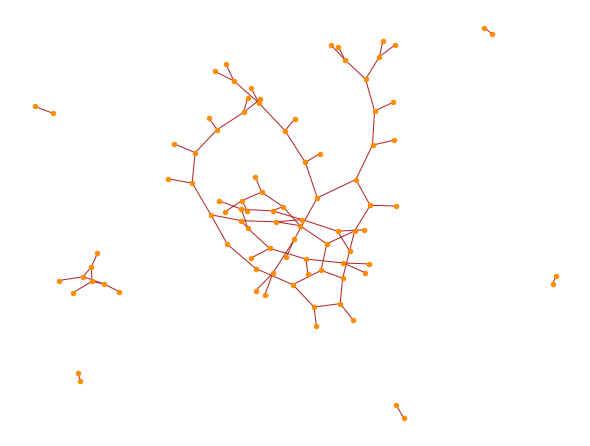

In [9]:
plt.figure(figsize=(8, 6))
# 绘制
fila.plot_network()
plt.show()

## 代码架构
这部分我写不动了Orz 改天有时间再写... 哪里不明白或者出了 bug 直接问我叭...

溜了溜了

![](./imgs/runningpanda.gif)